In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error
from datetime import datetime
import pydmd

In [2]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/NSE100.csv",header=None) #VARIABLE 1
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)

sym = pd.read_csv("DATA/nse100_SYM.csv",header=None) 

In [3]:
def dmd_pred_plot(dmd,diff,d_ind,top) :    
    dmode = dmd.modes[:,d_ind].real
    # Find the indices of the top 5 elements
    top_indices = np.argsort(dmode.real)[-top:]
    print("Recommended stocks are : ")
    for i in top_indices:
        print(sym[0][i],"[",i,"]")

    # Mark the indices on the plot
    plt.plot(diff)
    plt.scatter(top_indices,diff[top_indices], color='red')
    plt.title("NEXT 3 DAYS PERFORMACE - RECOMENDED STOCK")
    plt.show()


In [13]:
def dmd_analysis(result_comparison,j,top=3,i=12) :
    mat = matx.iloc[:, -(i+j):-j]
    mat=mat.to_numpy()

    # dmd 
    dmd = pydmd.DMD(svd_rank=mat.shape[1])
    dmd.fit(mat)
    dmd.dmd_time['tend'] = dmd.dmd_time['tend'] + 9

    # creating the matrix mat 
    # i days are trained j th day from last 

    #setting the test set 
    day0 = matx.iloc[:, -j-1]
    day1 = matx.iloc[:, -j]
    day2 = matx.iloc[:, -j+1]
    day3 = matx.iloc[:, -j+2]
    day4 = matx.iloc[:, -j+3]
    day5 = matx.iloc[:, -j+4]
    day6 = matx.iloc[:, -j+5]
    day7 = matx.iloc[:, -j+6]
    day8 = matx.iloc[:, -j+7]
    day9 = matx.iloc[:, -j+8]


    mat = matx.iloc[:, -(i+j):-j]
    mat=mat.to_numpy()
    day = np.array([day0,day1,day2,day3,day4,day5,day6,day7,day8,day9])
    day_r = day[result_comparison]
    d_ind = np.argmax(np.abs(dmd.amplitudes.real))

    if np.abs(dmd.eigs.real[d_ind])>1 and dmd.eigs.imag[d_ind] == 0 and dmd.amplitudes.real[d_ind] > 0 :
        print("^^^^ GrowinG ^^^^")
        fig, axs = plt.subplots(2, 1)
        axs[0].plot(dmd.amplitudes.real)
        dmd_pred_plot(dmd, day_r-day0, d_ind, top)
        plt.show()
 
    else:
        print("^^^^ Shrinking ^^^^")
        plt.plot(dmd.amplitudes.real)
        plt.show()
        if dmd.amplitudes.real[d_ind] > 0 :
            print("Amplitude is positive")
        plt.title('Amplitudes')
        
        dmd_pred_plot(dmd, day_r-day0, d_ind, top)
        
    




In [5]:
def dmd_pred(j,i,stock_name) :
    # creating the matrix mat 
    # i days are trained j th day from last 
    mat = matx.iloc[:, -(i+j):-j]
    mat=mat.to_numpy()
    # index where the stock is equal to the symbol
    stock_ind = sym[sym[0] == stock_name].index[0]
    #setting the test set 
    day0 = matx.iloc[:, -j-1]
    day1 = matx.iloc[:, -j]
    day2 = matx.iloc[:, -j+1]
    day3 = matx.iloc[:, -j+2]
    day4 = matx.iloc[:, -j+3]
    day5 = matx.iloc[:, -j+4]
    day6 = matx.iloc[:, -j+5]
    day7 = matx.iloc[:, -j+6]
    day8 = matx.iloc[:, -j+7]
    day9 = matx.iloc[:, -j+8]

    # dmd 
    dmd = pydmd.DMD(svd_rank=mat.shape[1])
    dmd.fit(mat)
    dmd.dmd_time['tend'] = dmd.dmd_time['tend'] + 9
    dmd.reconstructed_data.shape


    # prediction

    pred = dmd.reconstructed_data
    pday1 = np.real(pred[:,-9])
    pday2 = np.real(pred[:,-8])
    pday3 = np.real(pred[:,-7])
    pday4 = np.real(pred[:,-6])
    pday5 = np.real(pred[:,-5])
    pday6 = np.real(pred[:,-4])
    pday7 = np.real(pred[:,-3])
    pday8 = np.real(pred[:,-2])
    pday9 = np.real(pred[:,-1])



    # error
    print("Day1 |","Prediction :",pday1[stock_ind],"| Error :" ,np.abs(day1[stock_ind]-pday1[stock_ind]),"|")
    print("Day2 |","Prediction :",pday2[stock_ind],"| Error :" ,np.abs(day2[stock_ind]-pday2[stock_ind]),"|")
    print("Day3 |","Prediction :",pday3[stock_ind],"| Error :" ,np.abs(day3[stock_ind]-pday3[stock_ind]),"|")
    print("Day4 |","Prediction :",pday4[stock_ind],"| Error :" ,np.abs(day4[stock_ind]-pday4[stock_ind]),"|")
    print("Day5 |","Prediction :",pday5[stock_ind],"| Error :" ,np.abs(day5[stock_ind]-pday5[stock_ind]),"|")
    print("Day6 |","Prediction :",pday6[stock_ind],"| Error :" ,np.abs(day6[stock_ind]-pday6[stock_ind]),"|")
    print("Day7 |","Prediction :",pday7[stock_ind],"| Error :" ,np.abs(day7[stock_ind]-pday7[stock_ind]),"|")
    print("Day8 |","Prediction :",pday8[stock_ind],"| Error :" ,np.abs(day8[stock_ind]-pday7[stock_ind]),"|")
    print("Day9 |","Prediction :",pday9[stock_ind],"| Error :" ,np.abs(day9[stock_ind]-pday7[stock_ind]),"|")






^^^^ Shrinking ^^^^


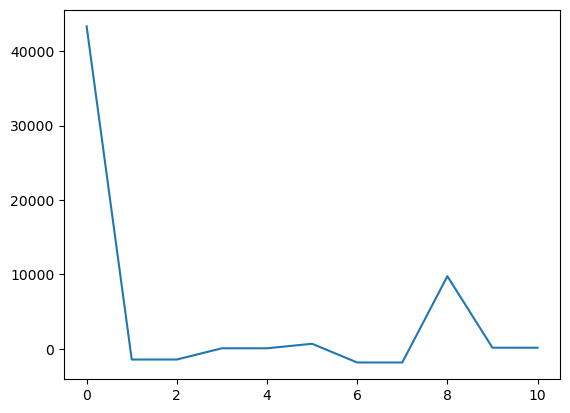

Amplitude is positive
Recommended stocks are : 
BOSCHLTD [ 95 ]
NESTLEIND [ 29 ]
SHREECEM [ 60 ]


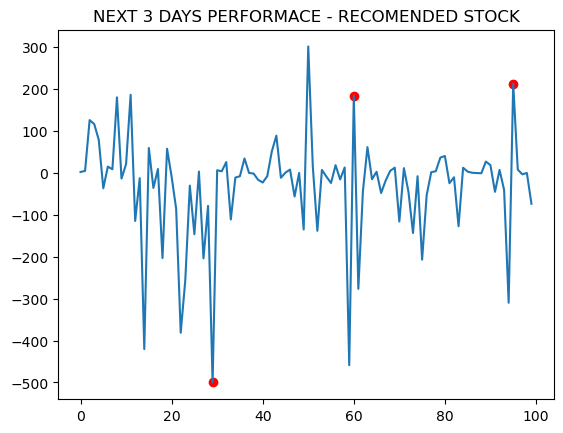

In [16]:
j=25 # date from last                  VARIABLE 2
top=3 # no of stock recomendations     VARIABLE 3 
i=12 # training days                   VARIABLE 4
# This variable is to compare the performance of the recomended stock
resust_comparison = 9               #  VARIABLE 5
dmd_analysis(resust_comparison,j,top,i) # analysis

SELECT STOCK 

In [11]:
sym


,0
0,KARURVYSYA
1,RELIANCE
2,TCS
3,HDFCBANK
4,INFY
...,...
95,BOSCHLTD
96,INDUSTOWER
97,PIIND
98,FACT


choosing HDFCBANK

In [12]:
stock = 'HDFCBANK' # VARIABLE 6

dmd_pred(25,12,stock)


Day1 | Prediction : 1490.643106826317 | Error : 18.156893173682874 |
Day2 | Prediction : 1479.0785152714475 | Error : 29.271484728552423 |
Day3 | Prediction : 1476.4993363465007 | Error : 48.25066365349926 |
Day4 | Prediction : 1470.1966797998925 | Error : 140.95332020010756 |
Day5 | Prediction : 1455.0762661462231 | Error : 159.97373385377682 |
Day6 | Prediction : 1450.7873604848344 | Error : 168.21263951516562 |
Day7 | Prediction : 1452.4344393562346 | Error : 180.46556064376546 |
Day8 | Prediction : 1442.4430435233749 | Error : 165.71556064376546 |
Day9 | Prediction : 1431.8532971660097 | Error : 161.46556064376546 |
